## Pour la Chine
On souhaite compter le nombre de médailles de la Chine aux JO d'été.

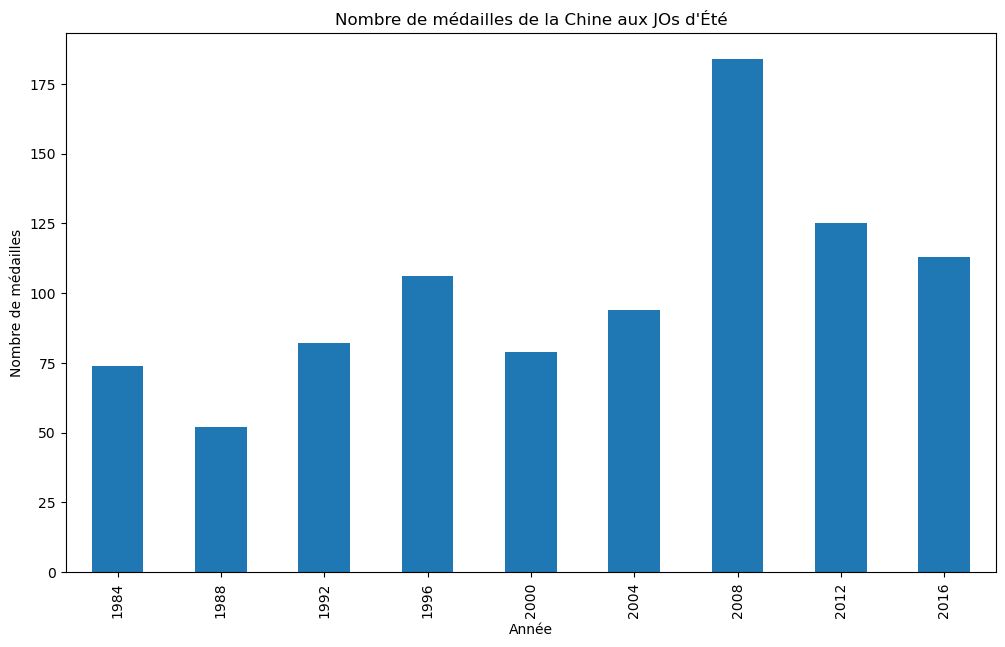

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("athlete_events.csv")

china = df[df['NOC'] == 'CHN']
china_medals = china[china['Medal'].notna()]
summer = china_medals[china_medals['Season'] == 'Summer']
editions = summer.groupby('Year').size()

plt.figure(figsize=(12,7))
editions.plot(kind='bar')
plt.title("Nombre de médailles de la Chine aux JO d'Été")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.show()

### Rq n°1
Le nombre de médailles gagnées par édition augmente sur la période.

### Rq n°2
En 2008 il y a une nette augmentation du nombre de médailles gagnées (puis une baisse aux JOs suivants) ; cela coincide avec le fait que la Chine a hebergé les JOs à Pékin cette année là. 
Une question émerge naturellement : est-ce que le fait d'héberger les JOs offre systématiquement un coup de boost en termes de médailles ? (augmentation qui repart à la baisse par la suite)

### Rq n°3
Avant 1984 le pays portait un autre nom donc il va falloir régler ça (et pareil pour tous les autres NOC des autres pays, il va falloir régler les mismatch)

## Pour la Grèce

Text(0, 0.5, 'Nombre de médailles')

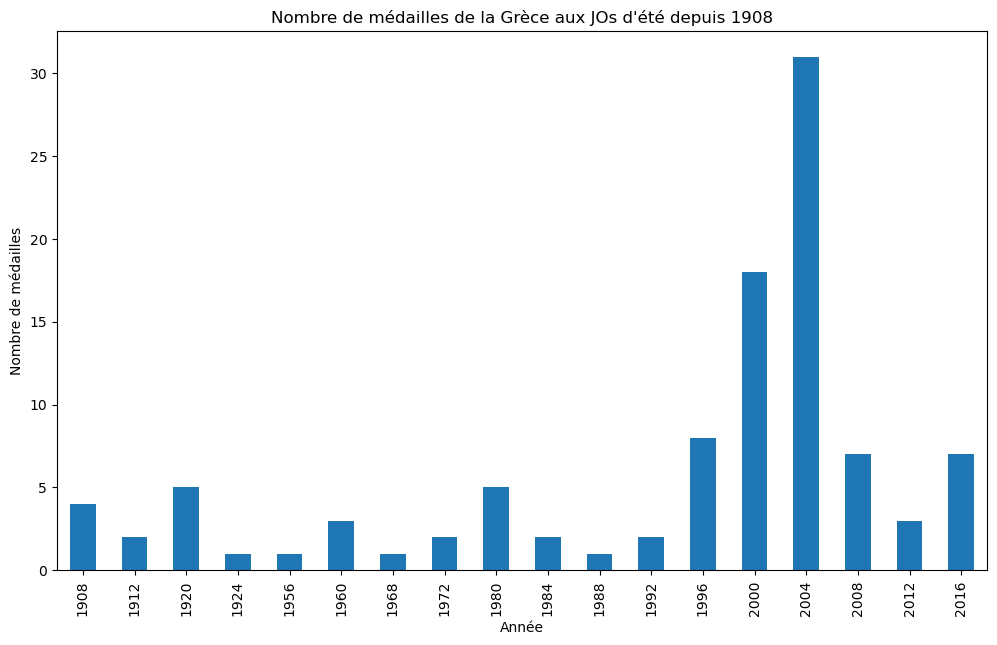

In [4]:
greece = df[df['NOC'] == 'GRE']
greece_medals = greece[greece['Medal'].notna()]
greece_summer = greece_medals[greece_medals['Season'] == 'Summer']

greece_editions_modern = greece_summer[greece_summer['Year'] >= 1908]
greece_2 = greece_editions_modern.groupby('Year').size()
plt.figure(figsize=(12,7))
greece_2.plot(kind = 'bar')
plt.title("Nombre de médailles de la Grèce aux JOs d'été depuis 1908")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")

### rq n°1
Il se produit la même chose que pour la Chine. En 2004, année lors de laquelle la Grèce a acceuilli les JOs d'été, le nombre de médailles gagnées est nettement supérieur à celui des éditions précédentes et suivantes. 

Pour confirmer cette intuition, on souhaite produire davantage de ces graphes pour chaque pays ayant acceuilli les JOs. Pour cela on peut automatiser la production des graphes. 

### rq n°2
le nombre de médailles gagnées par la Grèce lors des éditions 1896 et 1906 est très haut et aplatissait le reste du graphe, donc on se contente de regarder après 1908. (même si c'est pertinent car en 1896 et 1906 les JOs se sont passés en Grèce également). 

# La suite

🚜🦺 La suite est encore en construction, mais voici l'idée :

* Automatiser la productions de graphes comme les deux précédents. 

* Ainsi, pour chaque pays, produire un graphe du nombre de médailles par édition des JOs d'été.

* Puis mettre dans un dossier les graphes des pays ayant acceuilli les JOs sur leur sol et comparer, voir si il y a un pic l'année où ils ont acceuilli les JOs.


* Faire un graphe par pays automatiquement permettrait également de voir quels pays ont progressé ou régressé, voire même identifier d'autres tendances

In [ ]:
# import the packages
import pandas as pd
import matplotlib.pyplot as plt
import os

# pour se placer dans le dossier Axel_projet_info
os.chdir("/home/onyxia/work/Axel_projet_info")

# import dataframe
df = pd.read_csv("athlete_events.csv")
noc_df = pd.read_csv("noc_regions.csv")

# créer un dictionnaire NOC <-> nom du pays
noc_dict = dict(zip(noc_df["NOC"],noc_df["region"]))

# Select perfomances with medals (no NA)
df_medals = df[df['Medal'].notna()]

# select summer editions
df_summer = df_medals[df_medals['Season'] == 'Summer']


# make a list of the countries
countries = df_summer['NOC'].unique()

#créer un nouveau dossier pour contenir les photos des graphes
os.mkdir("/home/onyxia/work/Axel_projet_info/pictures_5")

#se placer dans le nouveau dossier
os.chdir("/home/onyxia/work/Axel_projet_info/pictures_5")


all_summer_years =  sorted(df_summer['Year'].unique())


# boucle
for country in countries:
    # select the perfomances of the country
    df_country = df_summer[df_summer['NOC'] == country]

    # group by year and count the number of medals
    medals_by_year = df_country.groupby('Year').size()

    # Put zero's every edition a country hasn't won a medal
    medals_by_year = medals_by_year.reindex(all_summer_years, fill_value=0)

    # get the country's name
    country_name = noc_dict.get(country, country)

    # make a graph
    plt.figure(figsize=(12,7))
    x = range(len(medals_by_year))
    plt.bar(x, medals_by_year.values)
    plt.xticks(x, medals_by_year.index)


    plt.title(f"Number of medals {country_name} has won at Summer Olympics")
    plt.xlabel("Year")
    plt.ylabel("Number of medals")


    plt.tight_layout()
    
    # save the graph picture in a folder
    plt.savefig(f"medals_{country_name}.png")
    plt.close()